In [32]:
import numpy as np

In [3]:
with open('data/day6.dat', 'r') as f:
    data = f.readlines()

In [4]:
data

['275, 276\n',
 '176, 108\n',
 '270, 134\n',
 '192, 224\n',
 '252, 104\n',
 '240, 271\n',
 '144, 220\n',
 '341, 303\n',
 '344, 166\n',
 '142, 347\n',
 '207, 135\n',
 '142, 353\n',
 '343, 74\n',
 '90, 210\n',
 '82, 236\n',
 '124, 295\n',
 '41, 226\n',
 '298, 109\n',
 '276, 314\n',
 '50, 303\n',
 '131, 42\n',
 '119, 335\n',
 '275, 125\n',
 '113, 289\n',
 '347, 230\n',
 '192, 329\n',
 '158, 316\n',
 '154, 356\n',
 '171, 350\n',
 '165, 59\n',
 '257, 129\n',
 '306, 55\n',
 '334, 203\n',
 '55, 63\n',
 '268, 198\n',
 '44, 103\n',
 '230, 199\n',
 '41, 181\n',
 '357, 328\n',
 '331, 85\n',
 '256, 290\n',
 '168, 290\n',
 '353, 77\n',
 '81, 328\n',
 '136, 316\n',
 '138, 213\n',
 '352, 271\n',
 '139, 222\n',
 '139, 318\n',
 '194, 239\n']

In [8]:
int_data = [tuple(map(int, y.split(','))) for y in data]
int_data

[(275, 276),
 (176, 108),
 (270, 134),
 (192, 224),
 (252, 104),
 (240, 271),
 (144, 220),
 (341, 303),
 (344, 166),
 (142, 347),
 (207, 135),
 (142, 353),
 (343, 74),
 (90, 210),
 (82, 236),
 (124, 295),
 (41, 226),
 (298, 109),
 (276, 314),
 (50, 303),
 (131, 42),
 (119, 335),
 (275, 125),
 (113, 289),
 (347, 230),
 (192, 329),
 (158, 316),
 (154, 356),
 (171, 350),
 (165, 59),
 (257, 129),
 (306, 55),
 (334, 203),
 (55, 63),
 (268, 198),
 (44, 103),
 (230, 199),
 (41, 181),
 (357, 328),
 (331, 85),
 (256, 290),
 (168, 290),
 (353, 77),
 (81, 328),
 (136, 316),
 (138, 213),
 (352, 271),
 (139, 222),
 (139, 318),
 (194, 239)]

In [18]:
max_x = max(list(map(lambda x: x[0], int_data)))
max_y = max(list(map(lambda x: x[1], int_data)))

In [21]:
len(int_data)

50

In [23]:
import string
string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [25]:
ids = ['#{}'.format(i) for i in range(len(int_data))]

In [121]:
def get_distance(l1, l2):
    x1, y1 = l1
    x2, y2 = l2
    return abs(x1 - x2) + abs(y1-y2)

def get_distances(l1, data):
    ids = ['#{}'.format(i) for i in range(len(data))]
    for id_, l2 in zip(ids, data):
        yield get_distance(l1, l2), id_

def get_closest(l1, data):
    distances = list(get_distances(l1, data))
    dist, id_ = min(distances)
    #print(distances)
    #print([dist_ for dist_, id_ in distances if  dist_ == dist])
    if len([dist_ for dist_, id_ in distances if  dist_ == dist]) == 1:
        return id_
    else:
        return '.'

def get_sum(l1, data):
    distances = [d for d, i in get_distances(l1, data)]
    s = sum(distances)
    if s < 10000:
        return 1
    else:
        return 0
#     #print(distances)
#     #print([dist_ for dist_, id_ in distances if  dist_ == dist])
#     if len([dist_ for dist_, id_ in distances if  dist_ == dist]) == 1:
#         return id_
#     else:
#         return '.'
        
get_sum((200,200), int_data)

1

In [123]:
def build_grid(data):
    max_x = max(list(map(lambda x: x[0], data)))
    max_y = max(list(map(lambda x: x[1], data)))
    grid = np.array([['...']*max_y]*max_x)
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            closest = get_closest((i,j), data)
            grid[i,j] = closest
    return grid

def build_sum_grid(data):
    max_x = max(list(map(lambda x: x[0], data)))
    max_y = max(list(map(lambda x: x[1], data)))
    grid = np.zeros((max_x, max_y))
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            grid[i,j] = get_sum((i,j), data)
            
    return grid
grid = build_sum_grid(int_data)

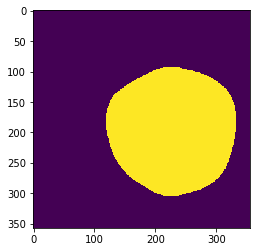

In [125]:
plt.imshow(grid)

In [126]:
np.sum(grid)

35334.0

In [99]:
side1 = grid[:, 0]
side2 = grid[0, :]
side3 = grid[:, -1]
side4 = grid[-1, :]

In [100]:
infinite_regions = set(side1)
infinite_regions.update(side2)
infinite_regions.update(side3)
infinite_regions.update(side4)

In [52]:
infinite_regions

{'#11',
 '#12',
 '#16',
 '#18',
 '#19',
 '#20',
 '#21',
 '#24',
 '#25',
 '#27',
 '#28',
 '#29',
 '#31',
 '#32',
 '#33',
 '#35',
 '#37',
 '#38',
 '#4',
 '#42',
 '#43',
 '#46',
 '#7',
 '#8'}

In [117]:
regions = set(ids) - infinite_regions

In [102]:
regions

{'#0',
 '#1',
 '#10',
 '#13',
 '#14',
 '#15',
 '#17',
 '#2',
 '#22',
 '#23',
 '#26',
 '#3',
 '#30',
 '#34',
 '#36',
 '#39',
 '#40',
 '#41',
 '#44',
 '#45',
 '#47',
 '#48',
 '#49',
 '#5',
 '#6',
 '#9'}

In [118]:
def get_region_size(id_, grid):
    g = np.int32(grid == id_)
    return np.sum(g)
get_region_size('#5', grid)

2274

In [119]:
sizes = [(get_region_size(id_, grid), id_) for id_ in regions]
max(sizes)

(5333, '#1')

In [60]:
x,y = grid.shape

In [61]:
x*y

127092

In [82]:
print(grid)

[['#33' '#33' '#33' ... '#19' '#19' '#19']
 ['#33' '#33' '#33' ... '#19' '#19' '#19']
 ['#33' '#33' '#33' ... '#19' '#19' '#19']
 ...
 ['#42' '#42' '#42' ... '#38' '#38' '#38']
 ['#42' '#42' '#42' ... '#38' '#38' '#38']
 ['#42' '#42' '#42' ... '#38' '#38' '#38']]


In [89]:
g[176, 108]

1

In [65]:
import matplotlib.pyplot as plt

In [75]:
int_data[1]

(176, 108)

In [86]:
g = np.int32(grid == '#1')


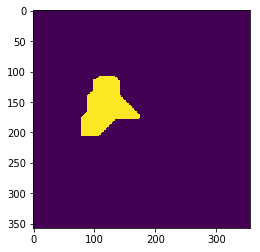

In [81]:
plt.imshow(g)

In [71]:
sizes

[(3582, '#45'),
 (2826, '#36'),
 (1901, '#23'),
 (2274, '#5'),
 (1440, '#39'),
 (1291, '#2'),
 (1150, '#15'),
 (1407, '#40'),
 (3413, '#34'),
 (2777, '#0'),
 (690, '#22'),
 (2349, '#17'),
 (358, '#48'),
 (2375, '#41'),
 (3259, '#10'),
 (372, '#9'),
 (400, '#44'),
 (880, '#26'),
 (5508, '#1'),
 (959, '#6'),
 (2062, '#49'),
 (1067, '#47'),
 (3723, '#13'),
 (2171, '#3'),
 (2405, '#14'),
 (1354, '#30')]